In [1]:
using DSP, FFTW, PyPlot


## Assignment 2: 

In [2]:
#data:

x=[1.,-1.,2.,4.];
h=[2.,-1.];

typeof(x)

Vector{Float64} (alias for Array{Float64, 1})

### 1-a. Convolution of the two discrete series using the definition:

In [3]:
"""
This function computes the convolution of two series x and h as a sum.
"""
function convolution(x :: Vector{Float64} , h :: Vector{Float64}) 
    
    Nx=length(x);
    Nh=length(h);
    Ny=Nx+Nh-1;
    y=zeros(Float64,Ny);
    
    for k=1:Nh;
        for n=1:Nx;
            y[k+n-1]= y[k+n-1]+ h[k]*x[n];
        end
    end
    
    return y

end

convolution

In [4]:
y1=convolution(x,h); #use the function.

### 1-b. Convolution of two discrete signals using matrix-time-vector multiplication :

In [5]:
#=
x=[2.,-1.,2.,4.];
h=[3.,-1., 1.];  

Nx=length(x);
Nh=length(h);
Ny=Nx+Nh-1;

X=zeros(Ny,Nh)
X[1:Nx,1]= x
X[2:Nx+1,2] = x
X[3:Nx+2,3] = x
=#

"""
This function computes the Toeplitz matrix "X" associated with two input vectors "x" and "h".

 X=Toeplitz(x,h);
"""
function Toeplitz(x :: Vector{Float64}, h :: Vector{Float64})
     
    Nx=length(x);
    Nh=length(h);
    Ny=Nx+Nh-1;
    
    X=zeros(Ny,Nh);
    
    for i=1:Nh;
        X[i:Nx+(i-1),i]= x
    end
    
    return X;
end

    
x=[1.,-1.,2.,4.];
h=[2.,-1.0];  

X=Toeplitz(x,h);

In [6]:
?Toeplitz #use help to understand how to use the function.

search: Toeplitz



This function computes the Toeplitz matrix "X" associated with two input vectors "x" and "h".

X=Toeplitz(x,h);


In [7]:
X=Toeplitz(x,h); #use the function.

y2=X*h; #convolution via matrix multiplication.



Are $y_1$ computed with the convolution sum and $y_2$ computed from the multiplication of a Toeplitz matrix and a vector equal?

In [8]:
println(y1 == y2); # comparison of the two methods.

[y1 y2] #print the two outputs, they must be equal.

true


5×2 Matrix{Float64}:
  2.0   2.0
 -3.0  -3.0
  5.0   5.0
  6.0   6.0
 -4.0  -4.0

### 1c. Convolution using the Z transform of the two discrete series:

The definition of the  **Z - Transform** is:


$$ X\left(z\right) = \sum_{n=o}^{N-1}  x_n Z^{n}$$


Therefore, the Z - Transform for the two signals are:

$X\left(z\right)= 1 -1Z + 2Z^{2} + 4Z^{3}$

$H\left(z\right)= 2 -1Z$

Using the property that:

$\mathcal{Z}\left\{y_n\right\}=Y\left(z\right)$

$\mathcal{Z}\left\{x_n \ast h_n \right\} =X\left(z\right) H\left(z\right)$


$Y\left(z\right)= 2 -3Z +5Z^{2}+6Z^{3}-4Z^{4} $

Where $y_n= (2, -3, 5, 6, -4)$ and is equivalent to the results obtained by sum and matrix-vector multiplication.




$\;\;\;\;\;\;$



$\;\;\;\;\;\;$


### 2. Show that convolution is commutative. Use $x_n=[x_0,x_1,x_2]^T$ and $h_n=[h_0,h_1]^T$ to prove the property.

$y_n = x_n \ast h_n$ if the number of samples in $x_n$ and $h_n$ are 3 and 2 respectively, then the number of samples of $y_n$ is equal to 4.

If we take the Z-transform of the convolution we have:


$y_n= x_n \ast h_n=  h_n \ast x_n$

$\mathcal{Z} \left\{x_n \ast h_n \right\}= \mathcal{Z} \left\{ h_n \ast x_n \right\}$

$Y\left(z\right)=X\left(z\right) H\left(z\right)=H\left(z\right)X\left(z\right)$

$Y\left(z\right)=(x_0+x_1Z+x_2Z^2)(h_0+h_1Z)=(h_0+h_1Z)(x_0+x_1Z+x_2Z^2)$

and because of properties of multiplication of two polinomials:

$X\left(z\right) H\left(z\right)=H\left(z\right)X\left(z\right)$ 



Another approach to prove this is using matrix notation:


$y_n= x_n \ast h_n=  h_n \ast x_n$

$y=Xh=Hx$ with $H(4x3),x(3x1), X(4x2), h(2x1)$

$y= \begin{pmatrix} x_0 & 0\\ x_1 & x_0\\ x_2 & x_1\\ 0 & x_2\\\end{pmatrix} [h_0,h_1]^T = \begin{pmatrix} x_0 & 0 & 0\\ x_0 & 0 & 0\\ x_0 & 0 & 0\\ x_0 & 0 & 0\\ \end{pmatrix} [x_0,x_1,x_2]^T$

If we apply the matrix to the vector at each side of the equal sign, we obtain the same result:

$y=(x_0h_0, x_1h_0+x_0h_1,x+2h_0 +x_1h_1, x_2h_1)= (x_0h_0, x_1h_0+x_0h_1,x+2h_0 +x_1h_1, x_2h_1)$

As a result:

$y=Xh=Hx~$ and $~y_n= x_n \ast h_n=  h_n \ast x_n$

$\;\;\;\;\;\;$



$\;\;\;\;\;\;$


### 3. The filter is designed using the z-trasnform as follows:

$d_n=(1,0.4)^T$

$\mathcal Z \left\{ d_n \right\} = D\left(z\right) = 1+ 0.4Z $

The condition to the inverse filter is:

$F\left(z\right)D\left(z\right)= 1$
 
$F\left(z\right)=\frac{1}{D\left(z\right)}= \frac{1}{1 + 0.4Z}$
 
Then, using the expresion for the geometric series and and the fact that the dipole is of minimum phase,the filter can be written as an infinite sum of terms such as:

$F\left(z\right)= 1 - 0.4z +(0.4z)^2 -(0.4z)^3+(0.4z)^4-(0.4z)^5.....$


Taking the inverse z-transform, we can write:

 $\mathcal Z^{-1} \left\{F\left(z\right)D\left(z\right)\right\}= \mathcal Z^{-1} \left\{1\right\}$
 
 $ (1,0.4) \ast (1,-(0.4)^1, (0.4)^2, -(0.4)^3, (0.4)^4, -(0.4)^5...)=(1,0,0,0,0,0,0) $

where $f_0=1$, $f_1=-(0.4)^1$, $f_2=(0.4)^2$, $f_3=-(0.4)^3$...


In [9]:
"""
This function computes the inverse filter of length N for a dipole of d=(1,a), a<1 using the geometric series expansion.
"""
function minphase_dipole_inverse_filter(N,a)
    
    d=[1, a];
    f=zeros(Float64,N);
    
    for j=1:N
        if j == 1;
            f[j] = 1.0
        else
            f[j] = (-1*a)^j
        end
    end
    return d,f
end


minphase_dipole_inverse_filter

In [10]:
#Convolve the inverse filter (f) with the dipole (d) to obtain the output signal:

d1,f1=minphase_dipole_inverse_filter(10,0.4); #compute the inverse filter.
r1=convolution(d1,f1); #convolution

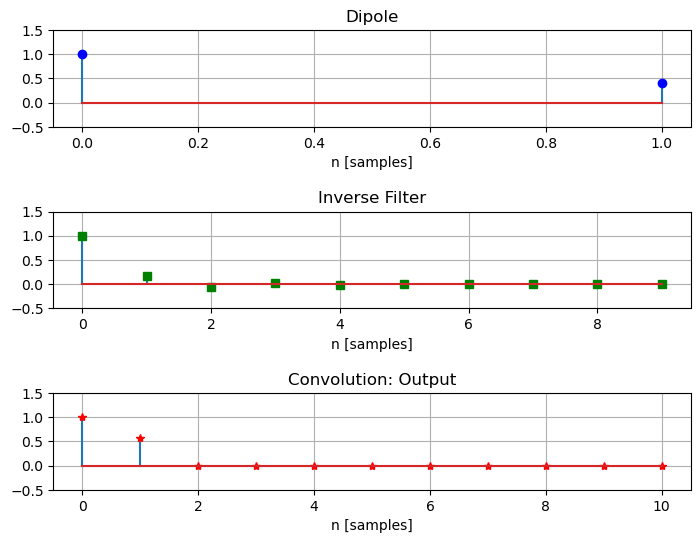

In [11]:
########
#PLOTS#
#######

nd=0:1:1;
nf=0:1:9
nr=0:1:10;


fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8,6))
fig.tight_layout(pad=4.0)
#colors=["orange","green","red","blue"]
axs[1,1].set_title("Dipole")
axs[1,1].grid("True")
axs[1,1].set_xlabel("n [samples]")
axs[1,1].stem(nd,d1,markerfmt="ob")
axs[1,1].set_yticks([-0.5,0,0.5,1,1.5])
axs[2,1].set_title("Inverse Filter")
axs[2,1].grid("True")
axs[2,1].stem(nf,f1,markerfmt="sg")
axs[2,1].set_yticks([-0.5,0,0.5,1,1.5])
axs[2,1].set_xlabel("n [samples]")
axs[3,1].set_title("Convolution: Output")
axs[3,1].stem(r1,markerfmt="*r")
axs[3,1].set_xlabel("n [samples]")
axs[3,1].set_yticks([-0.5,0,0.5,1,1.5])
axs[3,1].grid("True")





$\;\;\;\;\;\;$



$\;\;\;\;\;\;$

### 4. The can be designed in a similar way to the Exercise 3:

The only difference between the dipoles is that the in the case that $a= - 0.8$ the inverse filter converges slower than in the first case where $a=0.4$ since the pole is near the unit circle. Therefore, in the case of $a=0.4$ only a few coefficients are needed or required to model the inverse filter of the dipole.

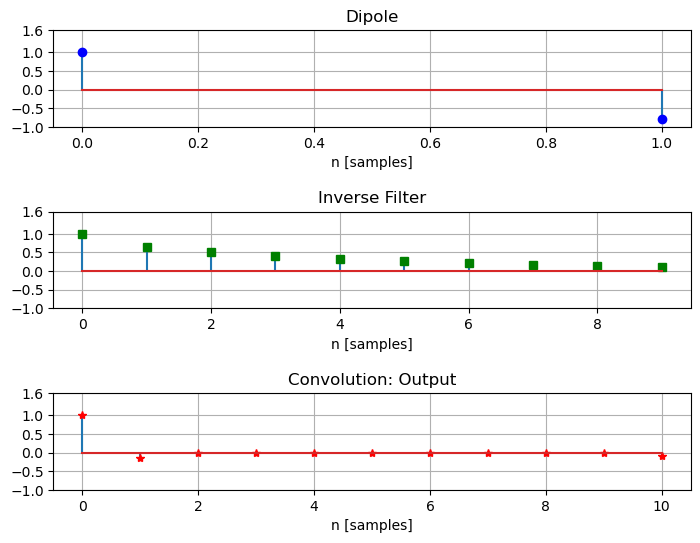

In [12]:
#exercise 4


#Usin the same function:

d4,f4=minphase_dipole_inverse_filter(10,-0.8);

r4=convolution(d4,f4);


fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8,6))
fig.tight_layout(pad=4.0)
#colors=["orange","green","red","blue"]
axs[1,1].set_title("Dipole")
axs[1,1].grid("True")
axs[1,1].set_xlabel("n [samples]")
axs[1,1].stem(nd,d4,markerfmt="ob")
axs[1,1].set_yticks([-1,-0.5,0,0.5,1,1.6])
axs[2,1].set_title("Inverse Filter")
axs[2,1].grid("True")
axs[2,1].stem(nf,f4,markerfmt="sg")
axs[2,1].set_yticks([-1,-0.5,0,0.5,1,1.6])
axs[2,1].set_xlabel("n [samples]")
axs[3,1].set_title("Convolution: Output")
axs[3,1].stem(r4, markerfmt="*r")
axs[3,1].set_xlabel("n [samples]")
axs[3,1].set_yticks([-1,-0.5,0,0.5,1,1.6])
axs[3,1].grid("True")






$\;\;\;\;\;\;$



$\;\;\;\;\;\;$

### 5. The filter is designed using the z-trasnform as follows:

$d_n=(1,2)^T$

$\mathcal Z \left\{ d_n \right\} = D\left(z\right) = 1+ 2Z $

The condition to the inverse filter is:

$F\left(z\right)D\left(z\right)= 1$
 
$F\left(z\right)=\frac{1}{D\left(z\right)}= \frac{1}{1 + 2Z}$
 
Then, using the expresion for the geometric series and and the fact that the dipole is of maximum phase. It is possible to compute an non casual stable filter:

$F\left(z\right)=  (2z)^{-1}(1 - (2z)^{-1} + (2z)^{-2} -(2z)^{-3}+ (2z)^{-4}-(2z)^{-5}).....$

$F\left(z\right)=  2z^{-1} - (2z)^{-2} + (2z)^{-3} -(2z)^{-4}+(2z)^{-5}.....$


Taking the inverse z-transform, we can write:

 $\mathcal Z^{-1} \left\{F\left(z\right)D\left(z\right)\right\}= \mathcal Z^{-1} \left\{1\right\}$
 
 $ (1,2) \ast (2^{-5},-2^{-4}, 2^{-3}, -2^{-2}, 2^{-1},0)=(-0.0156,0,0,0,0,1,0) $




$\;\;\;\;\;\;$



$\;\;\;\;\;\;$

In [13]:
"""
This function computes the inverse filter of length N for a dipole of d=(1,a) a>1 using the geometric series expansion.
"""
function maxphase_dipole_inverse_filter(N,a :: Float64)
    
    d=[1, a];
    f=zeros(Float64,N);
    
    for j=1:N
        if j == N;
            f[N] = 0.0
        else
            f[N-j] = -1*(-1*a)^(-1*j)
        end
    end
    return d,f
end

maxphase_dipole_inverse_filter

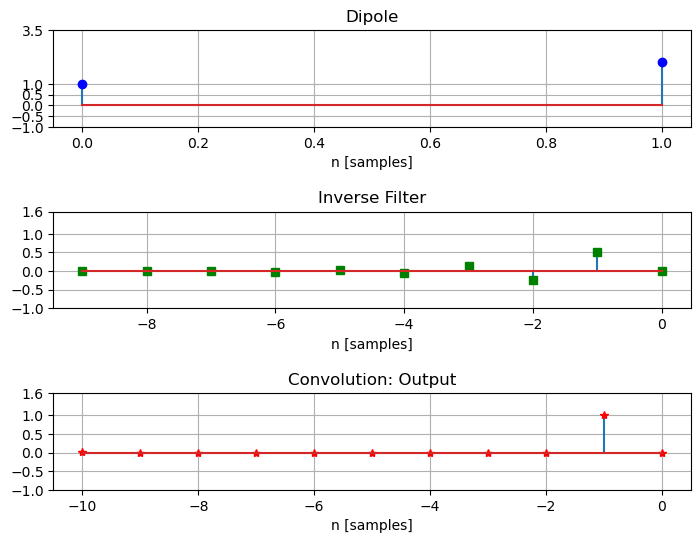

In [14]:
#exercise 5


d5,f5=maxphase_dipole_inverse_filter(10,2.0);

r5=convolution(d5,f5);


nd=0:1:1;
nf=-9:1:0
nr=-10:1:0;



fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8,6))
fig.tight_layout(pad=4.0)
#colors=["orange","green","red","blue"]
axs[1,1].set_title("Dipole")
axs[1,1].grid("True")
axs[1,1].set_xlabel("n [samples]")
axs[1,1].stem(nd,d5,markerfmt="ob")
axs[1,1].set_yticks([-1,-0.5,0,0.5,1,3.5])
axs[2,1].set_title("Inverse Filter")
axs[2,1].grid("True")
axs[2,1].stem(nf,f5,markerfmt="sg")
axs[2,1].set_yticks([-1,-0.5,0,0.5,1,1.6])
axs[2,1].set_xlabel("n [samples]")
axs[3,1].set_title("Convolution: Output")
axs[3,1].stem(nr,r5,markerfmt="*r")
axs[3,1].set_xlabel("n [samples]")
axs[3,1].set_yticks([-1,-0.5,0,0.5,1,1.6])
axs[3,1].grid("True")





$\;\;\;\;\;\;$



$\;\;\;\;\;\;$

### 6. Write a program to compute the inverse filter using the Least Square Filter Design:

We consider $\vec{y} =D\vec{f}$ as the convolution between the dipole $\vec{d}$ and the inverse filter $\vec{f}$. We cannot find an infinite filter $\vec{f}$. Therefore, we cannot obtain an output equal to $\vec{d}=(1,0,0,0,0...)$, but we can minimmize the difference between the actual output $\vec{y}$ and the desired output $\vec{d}$ using any criteria.


For simplicity, we choose Least Square criteria to minimize the difference. The least-squares inverse filter is obtained via the least-squares method where the filter $\vec{f}$ is computed by miniminzing the sum of the squares of the errors $e$ defined as follows:

$ \vec{e}=\vec{y}-\vec{d}= D\vec{f}-\vec{d}$ 

The sum of the squares of errors for every sample is:

$\|\vec{e}\|^{2}_{2} =\sum_{k}e^{2}_k$ 

$\|\vec{e}\|^{2}_{2}=\|D\vec{f}-\vec{y}\|^{2}_{2}$


Therefore we define a misfit function $J$:

$J=\|D\vec{f}-\vec{y}\|^{2}_{2}=\|\vec{e}\|^{2}_{2} $ 


To find the filter that minimizes the error and therefore the function we have to differentiate with respect to $\vec{f}$ and equal to 0:

$\frac{\partial J}{\partial\vec{f}}=0$

$\frac{\partial \|D\vec{f}-\vec{d}\|^{2}_{2}}{\partial\vec{f}}=0$

Applying the operator and solving the equation for the vector $\vec{f}$

$2D^{T}(D\vec{f}-\vec{d})=D^{T}D\vec{f} -D^{T}\vec{d}=0$

$D^{T}D\vec{f} =D^{T}\vec{d}$

$\vec{f}=(D^{T}D)^{-1}D^{T}\vec{d}$.


Where $\vec{f}$ is the inverse filter and is optimum in the least squares sense, which means that the error between the output and the desired output follows a Gaussian distribution.


In [15]:
# Write a program to obtain the inverse filter using least squares method:


"""
This function computes the inverse filter of length N for a signal d using the least square filter approach.

The desired output is y=(1,0,0,0...) with N+Nd-1 samples.
"""
function LS_inverse_filter(N::Int64,d)
    
    f=zeros(Float64,N); # filter variable of size Nx1,
    Ny=length(f)+length(d)-1 #length of desired output.
    y=[1;zeros(Float64,Ny-1)]; # desired output (Ny x 1).
    
    D=Toeplitz(d,f); # Toeplitz matrix of wavelet.
    D_tpose= D'; # Adjoint matrix (Transpose if input matrix is real).
    R= inv(D_tpose*D); # Inverse of the multilpication of D_tpose and D = autocorrelation of wavelet.
    g= D_tpose*y; # cross-correlation between the D_tpose and the desired output y.
    f= R*g; #Inverse filter.
    return f #return inverse filter.
end

    

LS_inverse_filter

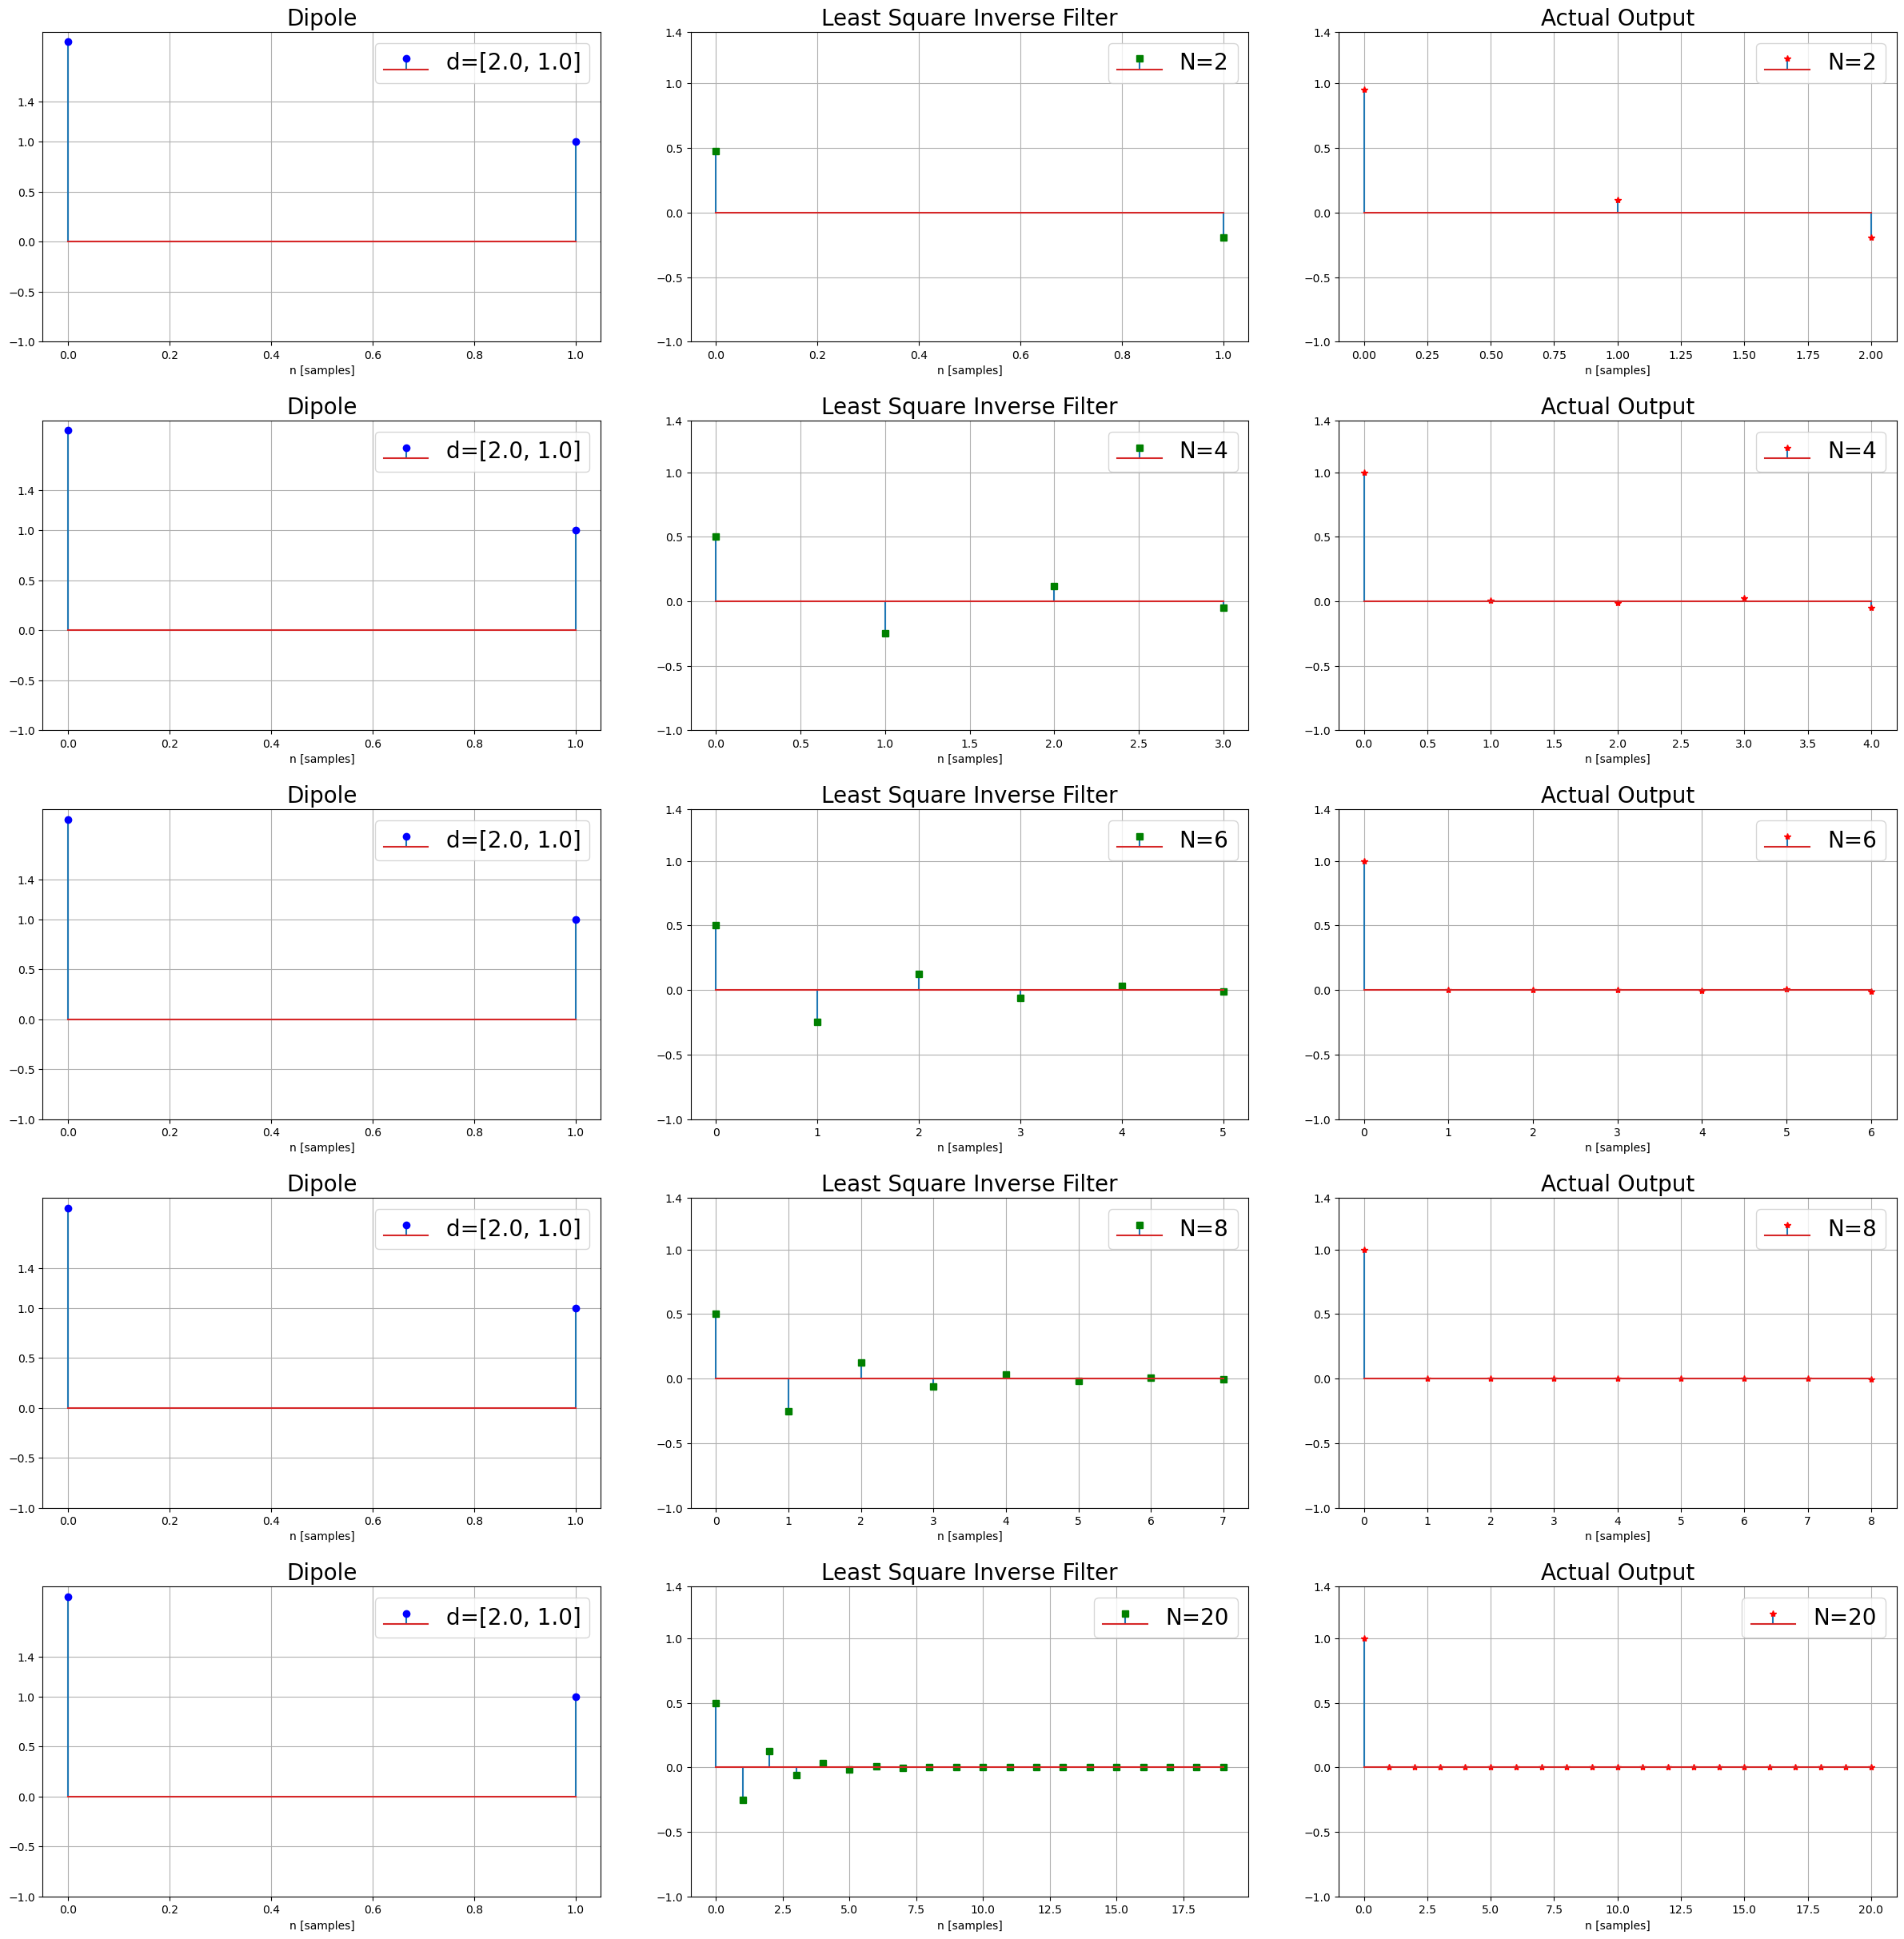

--------------------------------------------------
Root Mean Square for an inverse filter of length 2 : 0.047619047619047616
--------------------------------------------------
--------------------------------------------------
Root Mean Square for an inverse filter of length 4 : 0.002932551319648094
--------------------------------------------------
--------------------------------------------------
Root Mean Square for an inverse filter of length 6 : 0.00018311664530305805
--------------------------------------------------
--------------------------------------------------
Root Mean Square for an inverse filter of length 8 : 1.144413545278722e-5
--------------------------------------------------
--------------------------------------------------
Root Mean Square for an inverse filter of length 20 : 6.821210263298513e-13
--------------------------------------------------


In [19]:
d=[2.0,1.0]; #dipole
Nfs=[2,4,6,8,20]; #different lengths of filters


############### Ploting the results ################

fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(25,25))
fig.tight_layout(pad=5.0)
#colors=["orange","green","red","blue","magenta"]

for i = 1:length(Nfs)
    
    N=Nfs[i];
    n=(0:1:1)
    axs[i,1].stem(n,d,markerfmt="ob",label="d=$d");
    axs[i,1].grid("True");
    axs[i,1].set_title("Dipole", fontsize=20);
    axs[i,1].set_yticks([-1,-0.5,0,0.5,1,1.4])
    axs[i,1].set_xlabel("n [samples]")
    axs[i,1].legend(loc="upper right", fontsize=20);
    
    
    n=(0:1:Nfs[i]-1)
    f=zeros(Float64,Nfs[i]);
    f=LS_inverse_filter(Nfs[i],d);
    axs[i,2].stem(n,f,markerfmt="sg",label="N=$N");
    axs[i,2].grid("True");
    axs[i,2].set_title("Least Square Inverse Filter", fontsize=20);
    axs[i,2].set_yticks([-1,-0.5,0,0.5,1,1.4])
    axs[i,2].set_xlabel("n [samples]")
    axs[i,2].legend(loc="upper right", fontsize=20);
    
    
    y=convolution(d,f);
    n=(0:1:length(y)-1)
    axs[i,3].stem(n,y,markerfmt="*r",label="N=$N");
    axs[i,3].grid("True");
    axs[i,3].set_title("Actual Output", fontsize=20);
    axs[i,3].set_yticks([-1,-0.5,0,0.5,1,1.4])
    axs[i,3].set_xlabel("n [samples]")
    axs[i,3].legend(loc="upper right", fontsize=20);
    
    
    desired_output=[1;zeros(length(y)-1)]; # d= (1,0,0,0,0,0,0,.....)
    actual_output=y; # y
    e= actual_output .- desired_output;  #error 
    eRMS= e'*e; #root mean square
    
    
    
    
    
    println("--------------------------------------------------")
    println("Root Mean Square for an inverse filter of length $N : $eRMS")
    println("--------------------------------------------------")
  
    
    
    
end





$\;\;\;\;\;\;$



$\;\;\;\;\;\;$

The length of the inverse filter controls the similarity between the actual output and the desired output. If the filter is long, the actual output tends to the desired output. On the contrary, if the filter is short, the actual output and the desired output are not similar.


The computation of the mean square error between the actual output and the desired output for every iteration (different lengths of the inverse filter) shows that the longest filter produces an actual output which is similar to the desired output since the root mean square error is less than in other cases.


$\;\;\;\;\;\;$

$\;\;\;\;\;\;$
### 7.  Example of construction of a seismic trace and deconvolution to recover reflectivity

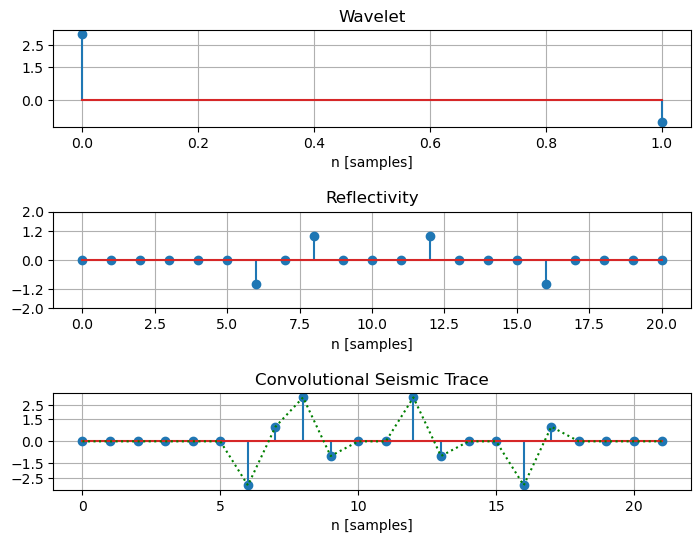

In [17]:
#exercise 7:

w=[3.0,-1.0]; #kind of wavelet.
r=zeros(Float64,21);  # reflecivity
r[7]=r[17]=-1.0; #reflectors
r[9]=r[13]=1.0; #reflectors


# Compute the sesimic trace using the convolutional model:

s= convolution(w,r); # s= w * r (seismic trace)


#Plots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8,6))
fig.tight_layout(pad=4.0)
#colors=["orange","green","red","blue"]
axs[1,1].set_title("Wavelet")
axs[1,1].grid("True")
axs[1,1].set_xlabel("n [samples]")
axs[1,1].set_yticks([-2.5,-1.5,0,1.5,2.5])
axs[1,1].stem(w)
axs[2,1].set_title("Reflectivity")
axs[2,1].grid("True")
axs[2,1].stem(r)
axs[2,1].set_xlabel("n [samples]")
axs[2,1].set_yticks([-2.0,-1.2,0,1.2,2.0])
axs[3,1].set_title("Convolutional Seismic Trace")
axs[3,1].stem(s)
axs[3,1].set_xlabel("n [samples]")
axs[3,1].set_yticks([-2.5,-1.5,0,1.5,2.5])
axs[3,1].plot(s, c="g",":")
axs[3,1].grid("True")




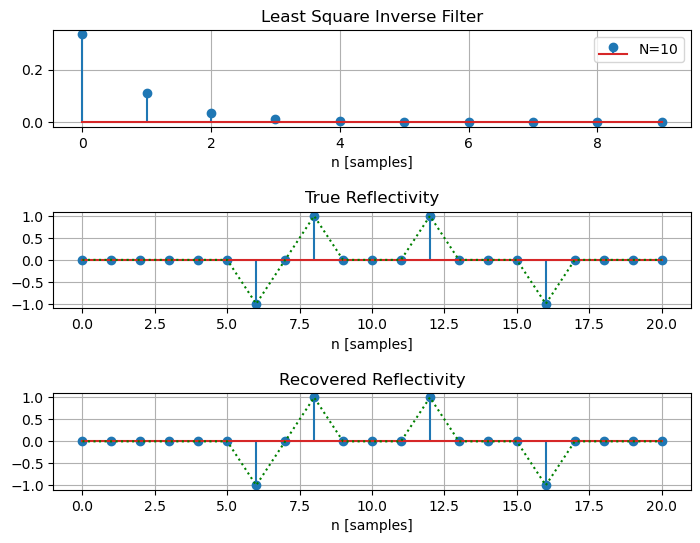

In [20]:
Nf=10; #length of the inverse filter.
f=LS_inverse_filter(Nf,w); # inverse filter: inverse of wavelet 
r_recovered= convolution(f,s); #recovered reflectivity.
r_recovered= r_recovered[1:length(r)];

#Plots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8,6))
fig.tight_layout(pad=4.0)
#colors=["orange","green","red","blue"]
axs[1,1].set_title("Least Square Inverse Filter")
axs[1,1].grid("True")
axs[1,1].stem(f, label="N=$Nf")
#axs[1,1].set_yticks([-2.5,-1.5,0,1.5,2.5])
axs[1,1].set_xlabel("n [samples]")
axs[1,1].legend(loc="upper right", fontsize=10);
axs[2,1].set_title("True Reflectivity")
axs[2,1].grid("True")
axs[2,1].stem(r)
axs[2,1].set_xlabel("n [samples]")
axs[2,1].set_yticks([-1.0,-0.5,0,0.5,1.0])
axs[2,1].plot(r, c="g",":")
axs[3,1].set_title("Recovered Reflectivity")
axs[3,1].stem(r_recovered)
axs[3,1].set_xlabel("n [samples]")
axs[3,1].set_yticks([-1.0,-0.5,0,0.5,1.0])
axs[3,1].plot(r_recovered, c="g",":")
axs[3,1].grid("True")




#### END